In [406]:
# Modules
import glob
import numpy as np
import pandas as pd
#from forex_python.converter import CurrencyRates
import matplotlib.pyplot as plt
from sklearn import neighbors

## Read data from csv file 

In [355]:
df = pd.read_csv(glob.glob("*.csv")[0])

In [356]:
df.head()

,Fecha,Cierre,Apertura,Máximo,Mínimo,Vol.,% var.
0,23.05.2018,581.04,640.00,649.49,579.04,354.20K,-9.28%
1,22.05.2018,640.51,696.51,698.11,638.28,202.52K,-7.99%
2,21.05.2018,696.13,715.50,719.68,686.74,84.90K,-2.71%
3,20.05.2018,715.50,695.62,722.64,687.44,116.42K,2.82%
4,19.05.2018,695.88,693.61,717.73,682.07,108.11K,0.33%


In [357]:
assert pd.notnull(df).all().all()

## Clean and get training data 

In [358]:
train_eth = np.array(df['Cierre'].apply(lambda x: float(x.replace(',', '').replace('.', '.'))))

In [359]:
train_X = np.array([np.arange(0, len(df['Fecha']))]).T

In [360]:
test_X =  np.array([np.arange(0, len(df['Fecha']) + 1)]).T

In [361]:
train_eth.shape

(143,)

## KNN

In [390]:
n_neighbors = 2

In [391]:
knn_distance = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, weights='distance')
knn_uniform = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, weights='uniform')

In [392]:
knn_distance.fit(train_X, train_eth)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='distance')

In [393]:
knn_uniform.fit(train_X, train_eth)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [394]:
knn_dis_predict = knn_distance.predict(test_X)

In [395]:
knn_uni_predict = knn_uniform.predict(test_X)

## Linear Regression 

## Plots

Text(0,0.5,'USD')

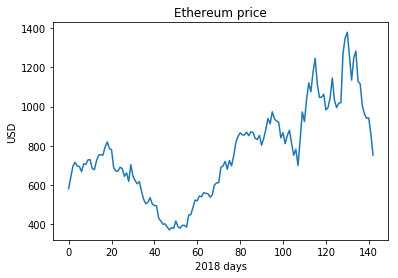

In [396]:
plt.plot(train_X, train_eth)
plt.title('Ethereum price')
plt.xlabel("2018 days")
plt.ylabel('USD')

Price for the last day:  787.9


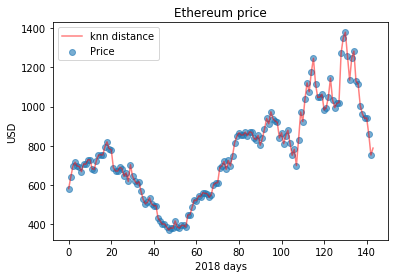

In [397]:
plt.scatter(train_X, train_eth, alpha=0.6, label='Price')
plt.plot(test_X, knn_dis_predict, color='red', alpha=0.5, label='knn distance')

plt.legend()
plt.title("Ethereum price")
plt.xlabel("2018 days")
plt.ylabel("USD")

print("Price for the last day: ", knn_dis_predict[-1])

Price for the last day:  805.62


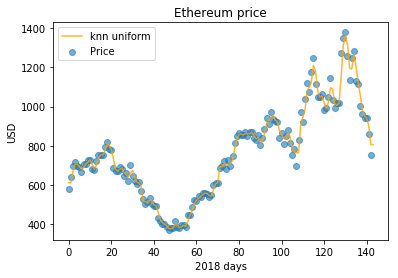

In [398]:
plt.scatter(train_X, train_eth, alpha=0.6, label='Price')
plt.plot(test_X, knn_uni_predict, color='orange', alpha=0.8, label='knn uniform')

plt.legend()
plt.title("Ethereum price")
plt.xlabel("2018 days")
plt.ylabel("USD")

print("Price for the last day: ", knn_uni_predict[-1])

In [399]:
knn_dis_predict.shape

(144,)

In [400]:
knn_distance.predict(144)

array([794.988])

In [401]:
knn_uniform.predict(144)

array([805.62])

In [403]:
(794.988+805.62)/2

800.3040000000001

# Bokeh test